<a href="https://colab.research.google.com/github/Dipon12/Implementation-of-SRGAN-in-Keras/blob/master/Implementation_of_SRGAN_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tqdm import tqdm

print(tf.__version__)

2.2.0


# Generator

In [0]:
gen_input_layer = tf.keras.layers.Input(shape=(64,64,3)) #shape of low resolution image

l1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(9,9), strides=(1,1), padding='same', activation='relu')(gen_input_layer)
l2 = tf.keras.layers.PReLU()(l1)

#One Block of ResNet
l3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l2)
l4 = tf.keras.layers.BatchNormalization()(l3)
l5 = tf.keras.layers.PReLU()(l4)
l6 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l5)
l7 = tf.keras.layers.BatchNormalization()(l6)
l8 = l7 + l2

#One Block of ResNet
l9 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l8)
l10 = tf.keras.layers.BatchNormalization()(l9)
l11 = tf.keras.layers.PReLU()(l10)
l12 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l11)
l13 = tf.keras.layers.BatchNormalization()(l12)
l14 = l8 + l13

#One Block of ResNet
l15 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l14)
l16 = tf.keras.layers.BatchNormalization()(l15)
l17 = tf.keras.layers.PReLU()(l16)
l18 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l17)
l19 = tf.keras.layers.BatchNormalization()(l18)
l20 = l18 + l14

#One Block of ResNet
l21 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l20)
l22 = tf.keras.layers.BatchNormalization()(l21)
l23 = tf.keras.layers.PReLU()(l22)
l24 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l23)
l25 = tf.keras.layers.BatchNormalization()(l24)
l26 = l20 + l24

#One Block of ResNet
l27 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l26)
l28 = tf.keras.layers.BatchNormalization()(l27)
l29 = tf.keras.layers.PReLU()(l28)
l30 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l29)
l31 = tf.keras.layers.BatchNormalization()(l30)
l32 = l26 + l31

#Block of ResNet Ends


l33 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l32)
l34 = tf.keras.layers.BatchNormalization()(l33)
l35 = l2 + l34


l36 = tf.keras.layers.UpSampling2D()(l35)
l37 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l36)
l38 = tf.keras.layers.PReLU()(l37)

l39 = tf.keras.layers.UpSampling2D()(l38)
l40 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(l39)
l41 = tf.keras.layers.PReLU()(l40)

gen_out = tf.keras.layers.Conv2D(filters=3, kernel_size=(9,9), strides=(1,1), padding='same', activation='tanh')(l41)

generator = tf.keras.Model(gen_input_layer,gen_out)


generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 64)   15616       input_1[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 64, 64, 64)   262144      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   36928       p_re_lu[0][0]                    
______________________________________________________________________________________________

# Discriminator

In [0]:
discriminator = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu',input_shape=(256,256,3)),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=1024),
          tf.keras.layers.LeakyReLU(),

          tf.keras.layers.Dense(units=1,activation='sigmoid')
])

discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 128)     5

# Loading Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

drive/  sample_data/


In [0]:
cd 'drive/My Drive/All Project Works/My Fancy Project/Image High Resolution'

/content/drive/My Drive/All Project Works/My Fancy Project/Image High Resolution


In [0]:
print(os.getcwd())

/content/drive/My Drive/All Project Works/My Fancy Project/Image High Resolution


In [0]:
img_file_names = os.listdir(os.getcwd()+'/cars')
low_res_img_datapath = os.getcwd() + '/low_res_car_0.3'
high_res_img_datapath = os.getcwd() + '/cars'

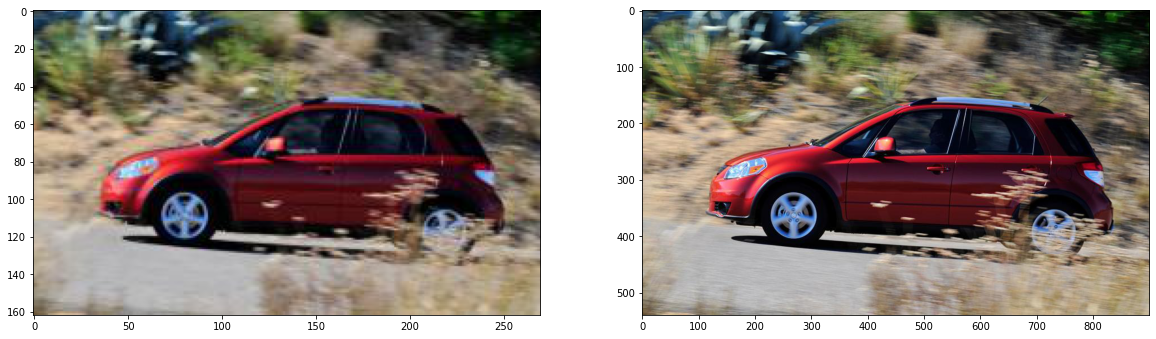

In [0]:
index = int(np.random.choice(range(len(img_file_names)),size = 1))

low_img = plt.imread(low_res_img_datapath+'/'+img_file_names[index])
high_img = plt.imread(high_res_img_datapath+'/'+img_file_names[index])


plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(low_img)

plt.subplot(1,2,2)
plt.imshow(high_img)

plt.show()

# The Adversial Network

In [0]:
from tensorflow.keras.applications.vgg19 import VGG19


vgg_model = VGG19(include_top= False)

discriminator.trainable = False
vgg_model.trainable = False

input_low_res_img_layer = tf.keras.layers.Input(shape=(64,64,3))
input_high_res_img_layer = tf.keras.layers.Input(shape=(256,256,3))

generated_image = generator(input_low_res_img_layer)
discriminator_output = discriminator(generated_image)
fake_features = vgg_model(generated_image)

GAN_model = tf.keras.models.Model(inputs = input_low_res_img_layer, outputs = [discriminator_output,fake_features])
GAN_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 256, 256, 3)  23768515    input_9[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 1)            138912577   model[3][0]                      
__________________________________________________________________________________________________
vgg19 (Model)                   multiple             20024384    model[3][0]                      
Total params: 182,705,476
Trainable params: 23,767,363
Non-trainable params: 158,938,113
___

In [0]:
any_img = vgg_model(np.expand_dims(high_img,axis=0))
print(any_img.shape)

vgg_model.summary()

(1, 16, 28, 512)
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        multiple                  1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        multiple                  73856     
_________________________________________________________________
block2_conv2 (Conv2D)        multiple                  147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   multiple       

In [0]:
my_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

vgg_model.compile(loss='mse', optimizer=my_optimizer, metrics=['accuracy'])
discriminator.compile(loss='binary_crossentropy', optimizer= my_optimizer, metrics=['accuracy'])
GAN_model.compile(loss=['binary_crossentropy','mse'], loss_weights=[1e-3,1],metrics=['accuracy'])

# Training

In [0]:
no_of_epochs = 100
batch_size = 8
low_res_shape = (64,64,3)
high_res_shape = (256,256,3)

In [0]:
from keras.callbacks import TensorBoard
import time
import skimage
from skimage.transform import resize

tensorboard = TensorBoard(log_dir="logs/".format(time.time()))
tensorboard.set_model(generator)
tensorboard.set_model(discriminator)

Using TensorFlow backend.


In [0]:
len(img_file_names)

7383

In [0]:
for ep in tqdm(range(no_of_epochs)):
  print("\n=======================================Epoch No. {}/{}========================================\n\n\n".format(ep+1,no_of_epochs))

  for mini_batch_no in range(int(len(img_file_names)/batch_size)):

    print("\n----------------Mini Batch No.{}/{}-------------------\n".format(mini_batch_no+1,int(len(img_file_names)/batch_size)))
    mini_batch_img_names = img_file_names[mini_batch_no * batch_size : (mini_batch_no+1)*batch_size]

    low_res_img_batch = []
    high_res_img_batch = []

    for filename in mini_batch_img_names:

      low_res_path = os.path.join(low_res_img_datapath,filename)
      high_res_path = os.path.join(high_res_img_datapath,filename)

      low_res_img = plt.imread(low_res_path)
      high_res_img = plt.imread(high_res_path) 

      low_res_img = skimage.transform.resize(low_res_img,low_res_shape)/127.5 - 1 #limiting in range [-1,1]
      high_res_img = skimage.transform.resize(high_res_img,high_res_shape)/127.5 - 1 #limiting in range [-1,1]

      low_res_img_batch.append(low_res_img)
      high_res_img_batch.append(high_res_img)

    low_res_img_batch = np.array(low_res_img_batch)
    high_res_img_batch = np.array(high_res_img_batch)

    

    generated_images = generator(low_res_img_batch)

    real_and_fake_images = np.concatenate([generated_images,high_res_img_batch],axis=0)
    real_and_fake_labels = np.concatenate([np.zeros((batch_size)),np.ones((batch_size))])

    indices = np.random.choice(range(batch_size*2),size=(batch_size*2),replace=False)

    real_and_fake_images = real_and_fake_images[indices]
    real_and_fake_labels = real_and_fake_labels[indices]
    

    discriminator.trainable = True
    discriminator.fit(real_and_fake_images,real_and_fake_labels)
    discriminator.trainable = False

    GAN_model.fit(low_res_img_batch, [np.ones((batch_size,1)),vgg_model(high_res_img_batch)])







  0%|          | 0/100 [00:00<?, ?it/s]


=======================================Epoch No. 1/100========================================




----------------Mini Batch No.1/922-------------------

1/1 [==============================] - 0s 1ms/step - loss: 0.0201 - sequential_loss: 0.6915 - vgg19_loss: 0.0195 - sequential_accuracy: 1.0000 - vgg19_accuracy: 1.0000

----------------Mini Batch No.2/922-------------------

1/1 [==============================] - 0s 1ms/step - loss: 0.0203 - sequential_loss: 0.6915 - vgg19_loss: 0.0196 - sequential_accuracy: 1.0000 - vgg19_accuracy: 1.0000

----------------Mini Batch No.3/922-------------------

1/1 [==============================] - 0s 1ms/step - loss: 0.0202 - sequential_loss: 0.6915 - vgg19_loss: 0.0195 - sequential_accuracy: 1.0000 - vgg19_accuracy: 1.0000

----------------Mini Batch No.4/922-------------------

1/1 [==============================] - 0s 1ms/step - loss: 0.0203 - sequential_loss: 0.6915 - vgg19_loss: 0.0196 - sequential_accuracy: 1.0000 - vgg19_accuracy: 1.0000

